# Problem Statement

Using the transaction dataset, identify the annual salary for each customer

Exploring correlations between annual salary and various customer attributes (e.g. age). Visualising interesting correlations using a scatter plot.

To Build a simple regression model to predict the annual salary for each customer using the attributes identified above, building a decision-tree based model to predict salary, testing its performance.

# Work Flow

1. Loading the data
2. Data Cleaning
3. Preparing the data
4. Data Visualization
5. Data Splitting
5. Data Modeling
6. Data Evaluation

# Loading the data

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# data directory
import os
import pickle

PICKLE_DATA_DIR = os.path.join("..", "cleaned_data", "procesed_data.pkl")
data = pd.read_pickle(PICKLE_DATA_DIR)
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,weekday,month_name
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,Wednesday,August
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,Wednesday,August
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,Wednesday,August
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,Wednesday,August
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,Wednesday,August


# Data Cleaning

In [3]:
data.describe()

,card_present_flag,balance,age,amount
count,7717.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,14704.195553,30.582330,187.933588
std,0.398029,31503.722652,10.046343,592.599934
min,0.000000,0.240000,18.000000,0.100000
25%,1.000000,3158.585000,22.000000,16.000000
50%,1.000000,6432.010000,28.000000,29.000000
75%,1.000000,12465.945000,38.000000,53.655000
max,1.000000,267128.520000,78.000000,8835.980000


In [4]:
data.columns

Index(['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat', 'movement',
       'weekday', 'month_name'],
      dtype='object')

**Removing all the irrelevant columns**

In [5]:
irrelevent_cols = ['status','card_present_flag','long_lat','txn_description','merchant_id','merchant_suburb',
                   'merchant_state','extraction','transaction_id','merchant_long_lat','movement','weekday', 'month_name']

data.drop(irrelevent_cols,axis=1,inplace=True)
data = data.reset_index(drop=True)

In [6]:
data.head()

,account,first_name,balance,date,gender,age,amount,customer_id
0,ACC-1598451071,Diana,35.39,2018-08-01,F,26,16.25,CUS-2487424745
1,ACC-1598451071,Diana,21.20,2018-08-01,F,26,14.19,CUS-2487424745
2,ACC-1222300524,Michael,5.71,2018-08-01,M,38,6.42,CUS-2142601169
3,ACC-1037050564,Rhonda,2117.22,2018-08-01,F,40,40.90,CUS-1614226872
4,ACC-1598451071,Diana,17.95,2018-08-01,F,26,3.25,CUS-2487424745


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   account      12043 non-null  object        
 1   first_name   12043 non-null  object        
 2   balance      12043 non-null  float64       
 3   date         12043 non-null  datetime64[ns]
 4   gender       12043 non-null  object        
 5   age          12043 non-null  int64         
 6   amount       12043 non-null  float64       
 7   customer_id  12043 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 752.8+ KB


In [8]:
#checking for null value present
data.isnull().sum()

account        0
first_name     0
balance        0
date           0
gender         0
age            0
amount         0
customer_id    0
dtype: int64

# Preparing the dataset

In [9]:
# Checking for number of customer
data['customer_id'].nunique()

100

In [10]:
# Preparing customer data
customer_data=[]

for cust in list(data['customer_id'].unique()):
    salary_txns_subset = data[data['customer_id'] == cust]
    salary_txns_subset = salary_txns_subset.reset_index(drop=True)
    account = salary_txns_subset['account'][0]
    first_name = salary_txns_subset['first_name'][0]
    gender = salary_txns_subset['gender'][0]
    age = salary_txns_subset['age'][0]
    avg_balance = round(sum(salary_txns_subset['balance']) / len(salary_txns_subset), 2)
    avg_salary = round(sum(salary_txns_subset['amount']) / len(salary_txns_subset), 2)
    row = (cust, account, first_name, gender, age,avg_balance, avg_salary, round(avg_salary*12,2))
    customer_data.append(row)
    
customer_df = pd.DataFrame(customer_data, columns = ('customer_id','account','first_name','gender',
                                                     'age','avg_balance','avg_salary','annual_salary'))

In [11]:
#Creating dummy variables for Gender

customer_data = pd.get_dummies(customer_df, columns = ['gender'], drop_first = True)

In [12]:
customer_data.head()

,customer_id,account,first_name,age,avg_balance,avg_salary,annual_salary,gender_M
0,CUS-2487424745,ACC-1598451071,Diana,26,1735.12,45.35,544.20,0
1,CUS-2142601169,ACC-1222300524,Michael,38,1191.29,78.21,938.52,1
2,CUS-1614226872,ACC-1037050564,Rhonda,40,3331.42,74.47,893.64,0
3,CUS-2688605418,ACC-1608363396,Robert,20,5592.98,159.30,1911.60,1
4,CUS-4123612273,ACC-2776252858,Kristin,43,5210.58,166.51,1998.12,0


In [13]:
customer_data.shape

(100, 8)

In [14]:
customer_data.tail()

,customer_id,account,first_name,age,avg_balance,avg_salary,annual_salary,gender_M
95,CUS-2505971401,ACC-2528867619,Abigail,40,11747.91,291.29,3495.48,0
96,CUS-2819545904,ACC-2650850707,Brian,42,111300.80,448.66,5383.92,1
97,CUS-3395687666,ACC-1998563091,David,42,16749.42,355.40,4264.80,1
98,CUS-1147642491,ACC-3233697971,Robin,34,9032.84,245.60,2947.20,0
99,CUS-261674136,ACC-240804743,Kenneth,29,14973.53,274.52,3294.24,1


# Data Visualization

Text(0, 0.5, 'Annual Salary')

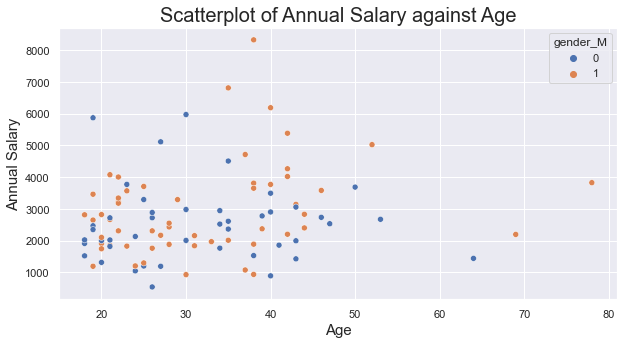

In [15]:
sb.set(style="whitegrid")
sb.set(rc={'figure.figsize':(10,5)})
age_salary_graph = sb.scatterplot(x="age", y="annual_salary", hue = 'gender_M', data=customer_data)
age_salary_graph.axes.set_title("Scatterplot of Annual Salary against Age",fontsize=20)
age_salary_graph.set_xlabel("Age", fontsize=15)
age_salary_graph.set_ylabel("Annual Salary", fontsize=15)

Text(0, 0.5, 'Annual Salary')

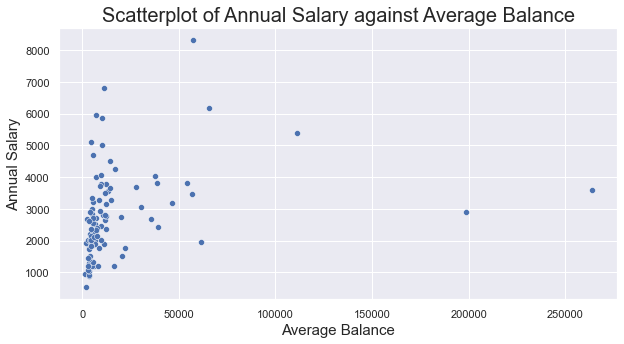

In [16]:
sb.set(style="whitegrid")
sb.set(rc={'figure.figsize':(10,5)})
age_salary_graph = sb.scatterplot(x="avg_balance", y="annual_salary", data=customer_data)
age_salary_graph.axes.set_title("Scatterplot of Annual Salary against Average Balance",fontsize=20)
age_salary_graph.set_xlabel("Average Balance", fontsize=15)
age_salary_graph.set_ylabel("Annual Salary", fontsize=15)

# Data Splitting

In [17]:
# splitting features and target

x = customer_data[['age', 'avg_balance','gender_M']]
y = customer_data.annual_salary

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [19]:
print(x.shape, x_train.shape, x_test.shape)

(100, 3) (70, 3) (30, 3)


# Linear Regression

**Model Building**

In [20]:
# loading the Linear Regression Model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(x_train,y_train)

In [21]:
# Prediction on training data
train_data_pred = linear_model.predict(x_train)

In [22]:
# R squared Value for trainig data
from sklearn import metrics

R_sq_train = metrics.r2_score(y_train, train_data_pred)
print(R_sq_train)

0.10067127419072963


**Model Evaluation**

In [23]:
# Prediction on test data
test_data_pred = linear_model.predict(x_test)

In [24]:
# R squared Value for test data
R_sq_test = metrics.r2_score(y_test, test_data_pred)
print(R_sq_test)

0.046079807424320274


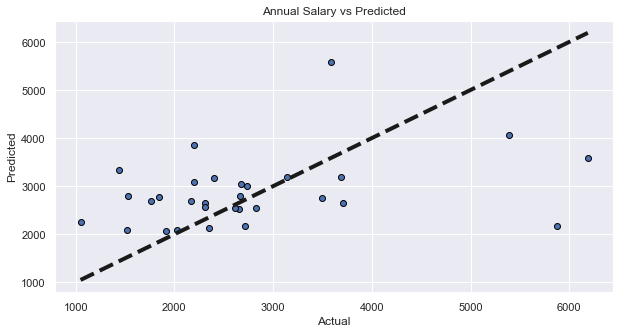

In [25]:
# Plot of predicted salary against actual salary
fig, ax = plt.subplots()
ax.scatter(y_test, test_data_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [26]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, test_data_pred)))

1182.0438656690492


**Interpretation**

By observing the following data as the R-squared value is close to 0, which indicates that the model has very less association with anual salary.

Also the RMSE is high, therefore we conclude that Linear Regressioin model has very poor performance in predicting the salary

# Decision Tree Regressor

**Model Building**

In [27]:
# Loading decision tree Model
from sklearn.tree import DecisionTreeRegressor

# loading the Model
tree_model = DecisionTreeRegressor().fit(x_train,y_train)

In [28]:
# Prediction on training data
tree_train_pred = tree_model.predict(x_train)

In [29]:
# R squared Value for trainig data

tree_R2_train = metrics.r2_score(y_train, tree_train_pred)
print(tree_R2_train)

1.0


**Model Evaluation**

In [30]:
# Prediction on test data
tree_test_pred = tree_model.predict(x_test)

In [31]:
# R squared Value for test data

tree_R2_test = metrics.r2_score(y_test, tree_test_pred)
print(tree_R2_test)

-0.6542903829598341


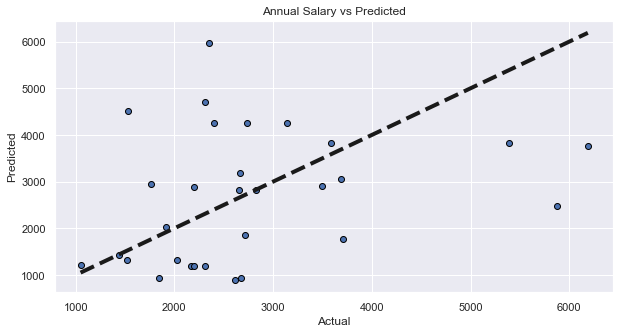

In [32]:
# Plot of predicted salary against actual salary

fig, ax = plt.subplots()
ax.scatter(y_test, tree_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [33]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, tree_test_pred)))

1556.6230068452671


**Interpretation**

By observing the following data as the R-squared value is becomes negative, which indicates that the model has very less association with anual salary.

Also the RMSE is high, therefore we conclude that Decision Tree model has very poor performance in predicting the salary

# Support Vector Machine Regressor

**Model Building**

In [36]:
# Loading Support Vector Machine Model
from sklearn import svm

SVM_model = svm.SVR(kernel='linear').fit(x_train,y_train)

In [37]:
# Prediction on training data
SVM_train_data_pred = SVM_model.predict(x_train)

In [38]:
# R squared Value for trainig data
SVM_R_sq_train = metrics.r2_score(y_train, SVM_train_data_pred)
print(SVM_R_sq_train)

0.019759352068765446


**Model Evaluation**

In [39]:
# Prediction on test data
SVM_test_data_pred = SVM_model.predict(x_test)

In [40]:
# R squared Value for test data
SVM_R_sq_test = metrics.r2_score(y_test, SVM_test_data_pred)
print(SVM_R_sq_test)

0.06496703655122915


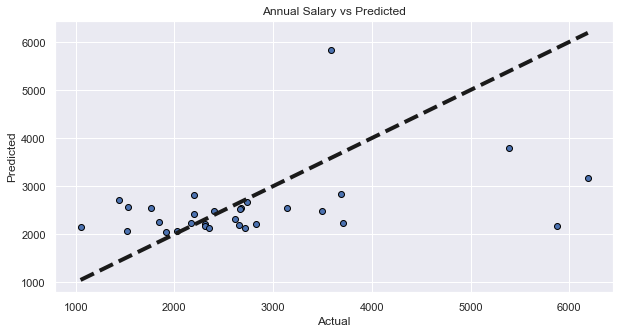

In [41]:
# Plot of predicted salary against actual salary

fig, ax = plt.subplots()
ax.scatter(y_test, SVM_test_data_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [42]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, SVM_test_data_pred)))

1170.2833691653564


**Interpretation**

By observing the following data as the R-squared value is close to 0, which indicates that the model has very less association with anual salary.

Also the RMSE is high, therefore we conclude that SVM model has very poor performance in predicting the salary

# KNN Regressor

**Model Building**

In [43]:
# Loading KNN Model
from sklearn.neighbors import KNeighborsRegressor

# loading the Model
KNN_model = KNeighborsRegressor(n_neighbors=5).fit(x_train,y_train)

# R squared Value for trainig data
KNN_train_pred = KNN_model.predict(x_train)
KNN_R2_train = metrics.r2_score(y_train, KNN_train_pred)
print(KNN_R2_train)

0.3490547147990445


In [44]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

parameters = [{'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15]}]
search = GridSearchCV(KNN_model, parameters, scoring='neg_mean_squared_error', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.4s finished


In [45]:
# optimum parameter values
search.best_params_

{'n_neighbors': 15}

In [46]:
KNN_model = KNeighborsRegressor(n_neighbors=15).fit(x_train,y_train)

In [47]:
# R squared Value for trainig data

KNN_train_pred = KNN_model.predict(x_train)
KNN_R2_train = metrics.r2_score(y_train, KNN_train_pred)
print(KNN_R2_train)

0.25523133255995034


**Model Evaluation**

In [48]:
# Prediction on test data
KNN_test_pred = KNN_model.predict(x_test)

In [49]:
# R squared Value for test data

KNN_R2_test = metrics.r2_score(y_test, KNN_test_pred)
print(KNN_R2_test)

0.29962642106504145


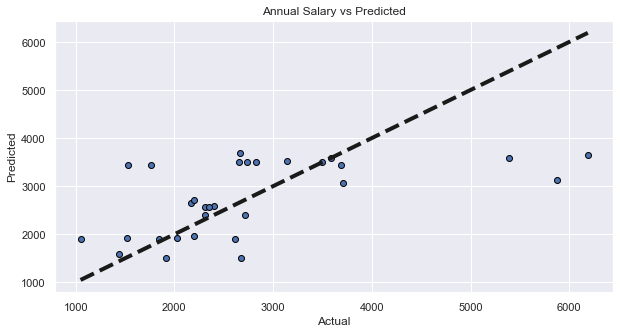

In [50]:
# Plot of predicted salary against actual salary

fig, ax = plt.subplots()
ax.scatter(y_test, KNN_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [51]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, KNN_test_pred)))

1012.8437433081177


**Interpretation**

By observing the following data as the R-squared value of KNN model is somewhat better than the previous models also the model has less association with anual salary.

The RMSE is high, therefore we conclude that KNN model has poor performance in predicting the salary

# Ridge Regression

**Model Building**

In [52]:
# loading the Linear Regression Model
from sklearn.linear_model import Ridge

Ridge_model = Ridge().fit(x_train,y_train)

In [53]:
# Prediction on training data
Ridge_train_pred = Ridge_model.predict(x_train)

In [54]:
# R squared Value for trainig data
Ridge_R2_train = metrics.r2_score(y_train, Ridge_train_pred)
print(Ridge_R2_train)

0.10062896021376377


**Model Evaluation**

In [55]:
# Prediction on test data
Ridge_test_pred = Ridge_model.predict(x_test)

In [56]:
# R squared Value for test data
Ridge_R2_test = metrics.r2_score(y_test, Ridge_test_pred)
print(Ridge_R2_test)

0.04623552493472016


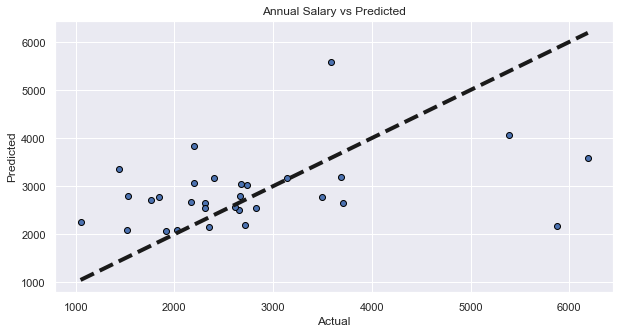

In [57]:
# Plot of predicted salary against actual salary

fig, ax = plt.subplots()
ax.scatter(y_test, Ridge_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [58]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, Ridge_test_pred)))

1181.9473835725066


**Interpretation**

By observing the following data as the R-squared value is close to 0, which indicates that the model has very less association with anual salary.

Also the RMSE is high, therefore we conclude that Ridge Regression model has very poor performance in predicting the salary

# Lasso Regression

**Model Building**

In [59]:
# loading the Linear Regression Model
from sklearn.linear_model import Lasso

Lasso_model = Lasso().fit(x_train,y_train)

In [60]:
# Prediction on training data
Lasso_train_pred = Lasso_model.predict(x_train)

In [61]:
# R squared Value for trainig data
Lasso_R2_train = metrics.r2_score(y_train, Lasso_train_pred)
print(Lasso_R2_train)

0.10066918814826309


**Model Evaluation**

In [65]:
# Prediction on test data
Lasso_test_pred = Lasso_model.predict(x_test)

In [66]:
# R squared Value for test data
Lasso_R2_test = metrics.r2_score(y_test, Lasso_test_pred)
print(Lasso_R2_test)

0.04619583184551446


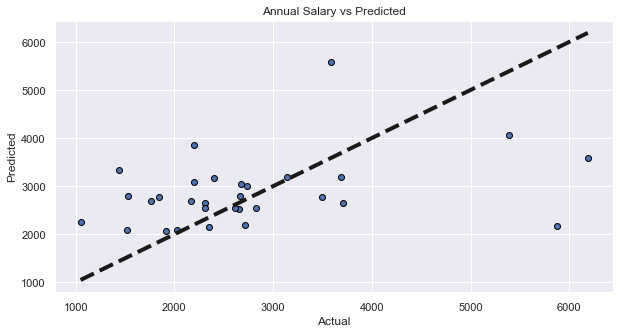

In [67]:
# Plot of predicted salary against actual salary

fig, ax = plt.subplots()
ax.scatter(y_test, Lasso_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [68]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, Lasso_test_pred)))

1181.9719780379376


**Interpretation**

By observing the following data as the R-squared value is close to 0, which indicates that the model has very less association with anual salary.

Also the RMSE is high, therefore we conclude that Lasso Regression model has very poor performance in predicting the salary

# Random Forest Regressor

**Model Building**

In [69]:
# Loading random forest Model
from sklearn.ensemble import RandomForestRegressor

# loading the Model
rf_model = RandomForestRegressor(n_estimators=500, max_features='sqrt').fit(x_train,y_train)

# R squared Value for trainig data
rf_train_pred = rf_model.predict(x_train)
rf_R2_train = metrics.r2_score(y_train, rf_train_pred)
print(rf_R2_train)

0.8600361448508878


In [70]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

parameters = [{'n_estimators':[100,200,300,400,500,600]}]
search = GridSearchCV(rf_model, parameters, scoring='neg_mean_squared_error', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   10.6s finished


In [71]:
# optimum parameter values
search.best_params_

{'n_estimators': 200}

In [73]:
rf_model = RandomForestRegressor(n_estimators=200, max_features='sqrt').fit(x_train,y_train)

In [74]:
# R squared Value for trainig data

rf_train_pred = rf_model.predict(x_train)
rf_R2_train = metrics.r2_score(y_train, rf_train_pred)
print(rf_R2_train)

0.8688780251197755


**Model Evaluation**

In [75]:
# Prediction on test data
rf_test_pred = rf_model.predict(x_test)

In [76]:
# R squared Value for test data

rf_R2_test = metrics.r2_score(y_test, rf_test_pred)
print(rf_R2_test)

0.3104230457358521


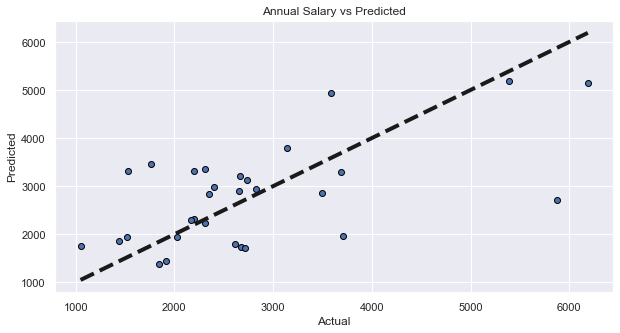

In [77]:
# Plot of predicted salary against actual salary

fig, ax = plt.subplots()
ax.scatter(y_test, rf_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [78]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, rf_test_pred)))

1005.0066650772893


**Interpretation**

By observing the following data as the R-squared value of Random Forest model is somewhat better than all the previous models also the model has less association with anual salary.

The RMSE is high, therefore we conclude that Random Forest model has poor performance in predicting the salary

# Bagging

**Model Building**

In [82]:
# loading the Model
bag_model = RandomForestRegressor(n_estimators=500, max_features=None).fit(x_train,y_train)

# R squared Value for trainig data
bag_train_pred = bag_model.predict(x_train)
bag_R2_train = metrics.r2_score(y_train, bag_train_pred)
print(bag_R2_train)

0.8502462312680101


In [83]:
# hyperparameter tuning
parameters = [{'n_estimators':[100,200,300,400,500,600]}]
search = GridSearchCV(bag_model, parameters, scoring='neg_mean_squared_error', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   11.9s finished


In [81]:
# optimum parameter values
search.best_params_

{'n_estimators': 400}

In [84]:
bag_model = RandomForestRegressor(n_estimators=400, max_features=None).fit(x_train,y_train)

In [85]:
# R squared Value for trainig data

bag_train_pred = bag_model.predict(x_train)
bag_R2_train = metrics.r2_score(y_train, bag_train_pred)
print(bag_R2_train)

0.8538666826409226


**Model Evaluation**

In [86]:
# Prediction on test data
bag_test_pred = bag_model.predict(x_test)

In [87]:
# R squared Value for test data

bag_R2_test = metrics.r2_score(y_test, bag_test_pred)
print(bag_R2_test)

0.28928706043147434


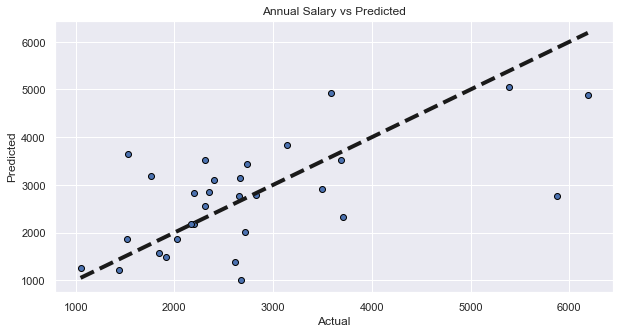

In [88]:
# Plot of predicted salary against actual salary

fig, ax = plt.subplots()
ax.scatter(y_test, bag_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [89]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, bag_test_pred)))

1020.2924753539423


**Interpretation**

By observing the following data as the R-squared value of Bagging model is somewhat better than all the previous models also the model has less association with anual salary.

The RMSE is high, therefore we conclude that Bagging model has poor performance in predicting the salary

# Comparison

Decreasing order of R-square values are depicted as:

- Random Forest Regressor - 0.3104
- KNN Regressor - 0.2996
- Bagging - 0.2893
- SVM Regressor - 0.0649
- Ridge Regression - 0.0462
- Lasso Regression - 0.0461
- Linear Reression - 0.0460
- Decision Tree Regressor - -0.6543

The results are highly clear none of the models are good in predicting the sales. Random Forest Regressor is slightly better than the remaining models for the given data.

# Building a predective system

In [90]:
# input data -> (first_name: Robert, age: 20, avg_balance: 5592.98, gender_M: 1(Male))
# output ->  annual_salary: 1911.60


input_data = (20, 5592.98, 1)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [91]:
prediction = rf_model.predict(input_data_reshape)
print(prediction)

[1950.09288]


In [92]:
# input data -> (first_name: Abigail, age: 40, avg_balance: 11747.91, gender_M: 0(Female))
# output ->  annual_salary: 3495.48


input_data = (40, 11747.91, 0)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [93]:
prediction = rf_model.predict(input_data_reshape)
print(prediction)

[2933.03448]
